## Seasonal Auto Regression Integrated Moving Average (SARIMA)

SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading Dataset

In [2]:
df = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [3]:
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [4]:
df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    96 non-null     datetime64[ns]
 1   MilesMM  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
df.index = df['Month'] 

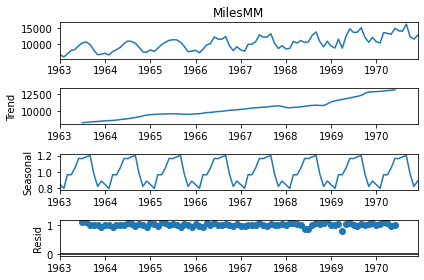

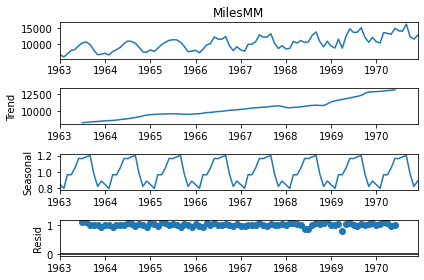

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_a = seasonal_decompose(df['MilesMM'], model='multiplicative')
result_a.plot()

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [9]:
model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

D:\Programming\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [10]:
model_fit = model.fit()

D:\Programming\Python\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Programming\Python\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Programming\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
residuals = model_fit.resid

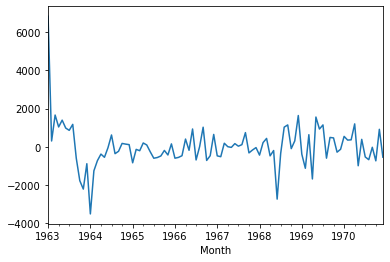

In [12]:
residuals.plot();

In [13]:
output = model_fit.forecast()

In [14]:
output

1971-01-01    11475.896069
Freq: MS, dtype: float64

In [15]:
model_fit.forecast(12)

1971-01-01    11475.896069
1971-02-01    11153.502300
1971-03-01    13669.509349
1971-04-01    12647.368334
1971-05-01    14338.994360
1971-06-01    15786.400730
1971-07-01    14979.200026
1971-08-01    15362.174645
1971-09-01    16962.867549
1971-10-01    13682.105221
1971-11-01    12426.901265
1971-12-01    13730.128736
Freq: MS, Name: predicted_mean, dtype: float64

In [16]:
yhat = model_fit.predict()

In [17]:
yhat.head()

1963-01-01       0.000000
1963-02-01    5872.059263
1963-03-01    5422.255546
1963-04-01    7122.548182
1963-05-01    7067.360265
Freq: MS, Name: predicted_mean, dtype: float64

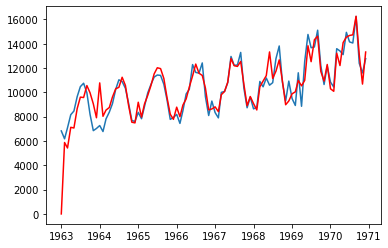

In [19]:
plt.plot(df['MilesMM']);
plt.plot(yhat, color='red');

#### Walk Forward SARIMAX

In [20]:
train_size = int(df.shape[0]*0.7)

In [23]:
train, test = df.MilesMM[0:train_size], df.MilesMM[train_size:]

In [24]:
test.shape

(29,)

In [25]:
data = train
predict =[]
for t in test:
    model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y)
    predict.append(y)
    data = np.append(data, t)
    data = pd.Series(data)

D:\Programming\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Programming\Python\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Programming\Python\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Programming\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01    11475.896069
Freq: MS, dtype: float64
1971-01-01  

In [26]:
predict

[1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-01    11475.896069
 Freq: MS, dtype: float64,
 1971-01-0

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

4477961.310853941